<a href="https://colab.research.google.com/github/cstps/fastaiandPytoch/blob/main/fastaipytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 모델에서 제품까지





### 2.1.2 딥러닝의 현 상황
  - 컴퓨터 영상처리
    - 물체인식 (object recongnition) : 이미지 내 물체를 인식하는 작업
    - 물체탐지 (object detection) : 이미지 내 물체의 위치 식별하여 물체의 이름과 위치를 표시하는 작업
    - 세크먼테이션 : 물체의 종류에 따라 픽셀을 분류하는 작업
    - 모델 학습에 사용된 이미지와 구조나 스타일 크게 다른 이미지는 잘 인식하지 못함. 그래서 실전상황에서 예기치 않은 종류의 이미지가 등장했을 때 해당 이미지를 인식하도록 영역밖(out of domain) 데이터 검증을 합니다.
    - 데이터 증강(data augmentation) : 입력 이미지를 회전하거나 명도 및 채도를 바꾸는 등 다양한 합성 이미지를 생성

In [ ]:

!pip install fastai2

## 2.2 데이터 수집
  - 석리샘 키로 이용 " 59f9d72003ff4622b3b8facfda8ec378"

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *




Mounted at /content/gdrive


In [4]:
search_images_bing
# 회색곰 이미지(빙이미지 검색이 회색곰이라고 찾은 결과) 150장의  URL 다운
key = '59f9d72003ff4622b3b8facfda8ec378'
results = search_images_bing(key,'grizzly bear')
print(results)
ims = results.attrgot('contentUrl') # 속성 제목이 교재와 다르게 변경됨 content_url 에서 contectUrl로 변경, https://github.com/fastai/fastbook/pull/389/files
len(ims)

[{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=grizzly+bear&id=CB17B3DC66E2F4684C9CA770135FF2F3D1B2070D&simid=608018286646617427', 'name': 'Idaho Grizzly Bears are Waking Up, Emerging from Dens', 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.H3h0vO_c6L61im-L99pEegHaE8&pid=Api', 'datePublished': '2015-04-22T09:38:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://tetonvalleylodge.com/wp-content/uploads/2015/04/grizzly-bear-idaho.jpg', 'hostPageUrl': 'https://tetonvalleylodge.com/grizzly-bears-idaho-are-waking-up/', 'contentSize': '477917 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'https://tetonvalleylodge.com/grizzly-bears-idaho-are-waking-up', 'width': 3150, 'height': 2100, 'hostPageDiscoveredDate': '2015-04-22T09:38:24.0000000Z', 'thumbnail': {'width': 474, 'height': 316}, 'imageInsightsToken': 'ccid_H3h0vO/c*cp_9AD6DD7A0450257A1DD35511F3C7D0B5*mid_CB17B3DC66E2F4684C9CA770135FF2F3D1B2070D*simid_608018286646617427*thid_OIP.H

150

In [5]:
print(ims)
#ims = ['https://tetonvalleylodge.com/wp-content/uploads/2015/04/grizzly-bear-idaho.jpg']

['https://tetonvalleylodge.com/wp-content/uploads/2015/04/grizzly-bear-idaho.jpg', 'https://bozone.com/site/wp-content/uploads/2019/03/GRIZZLY.jpeg', 'http://www.pbs.org/wnet/nature/files/2018/07/Bear133.jpg', 'https://gohunt-assets-us-west-2.s3.amazonaws.com/wyoming-grizzly-bear-og_0.jpg', 'https://i0.wp.com/www.commonsenseevaluation.com/wp-content/uploads/2013/08/Bear.jpg', 'https://media.salon.com/2014/03/Grizzly-Bear.jpg', 'https://wallsdesk.com/wp-content/uploads/2017/01/Grizzly-Bear-Background-.jpg', 'https://www.columbiatribune.com/storyimage/MO/20171003/NEWS/171009653/AR/0/AR-171009653.jpg', 'https://davidsuzuki.org/wp-content/uploads/2017/04/grizzly-bears-alaska-wildlife-sanctuary-whittier.jpg', 'http://www.wallpapergeeks.com/wp-content/uploads/2014/03/Grizzly-Bear-Near-McNeil-River-Alaska.jpg', 'https://www.thefencepost.com/wp-content/uploads/sites/12/2018/08/grizzlies-tsln-081118-1240x828.jpg', 'https://wildlifeimages.org/wp-content/uploads/2016/09/DSC1704.jpg', 'https://med

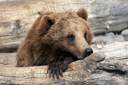

In [6]:
#  다운로드한 이미지ㅣ 하나 보기

dest = 'images/grizzly.jpg'
download_url(ims[0],dest)

img = Image.open(dest)
img.to_thumb(128,128)

 - 모든 URL의 이미지를 fastai가 제공하는 download_images 함수로 다운로드
 

In [7]:
bear_types ='grizzly','black','teddy'
path = Path('bears')

if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} bear')
    download_images(dest,urls=results.attrgot('contentUrl'))

In [8]:
fns = get_image_files(path)
fns

(#429) [Path('bears/teddy/00000066.jpg'),Path('bears/teddy/00000027.jpeg'),Path('bears/teddy/00000139.png'),Path('bears/teddy/00000074.jpg'),Path('bears/teddy/00000117.jpg'),Path('bears/teddy/00000049.JPG'),Path('bears/teddy/00000146.jpg'),Path('bears/teddy/00000042.jpg'),Path('bears/teddy/00000106.jpg'),Path('bears/teddy/00000057.jpg')...]

In [9]:
# 파일오류여부 체크
failed = verify_images(fns)
failed



(#0) []

In [10]:
#  오류가 발생한 모든 파일(요소) 삭제하기
failed.map(Path.unlink)

# 주피터 노트북에서 도움말 사용방법 ??
??verify_images

## 2.3 데이터에서 DataLoaders까지
  - DataLoaders : 단순히 전달받은 여러 DataLoader 객체를 목적에 맞게 학습요ㅇ과 검증용으로 나누어 저장하는 클래스
  - 다운로드한 데이터로 DataLoaders로 만들려면
    - 작업 데이터 유형
    - 데이터 목록을 가져오는 방볍
    - 각 데이터에 레이블을 지정하는 방법
    - 검증용 데이터셋을 만드는 방법

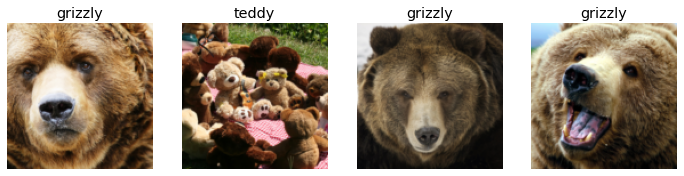

In [11]:
# 데이터블록 API를 사용해 우리가 다운로드한 데이터셋을 DataLoaders로 만드는 방법
bears = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(valid_pct=0.2,seed=42),
                  get_y = parent_label,
                  item_tfms=Resize(128))
# dataloaders 메소드를 호출할 때 비로소 실제 데이터의 경로로 지정
dls = bears.dataloaders(path)
# 데이터 블록  API가 구성한 데이터를 모델에 주입하기 전에 미리 확인
dls.valid.show_batch(max_n=4,nrows=1)

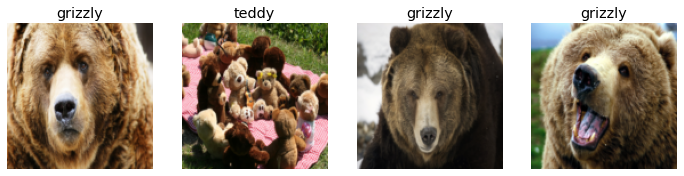

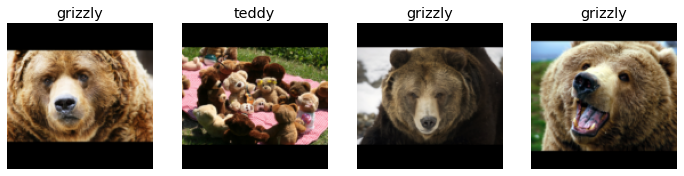

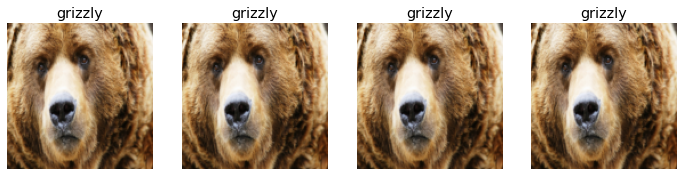

In [12]:
# 앞의 Resize()는 이미지의 너비나 퐁이 중 더 작은 쪽을 기준으로 나머지를 잘라내는 작업을 하기 때문에
# 이미지의 중요한 세부사항이 유실될 수 있다. 

# 이미지를 찌그러뜨리기

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
# dataloaders 메소드를 호출할 때 비로소 실제 데이터의 경로로 지정
dls = bears.dataloaders(path)
# 데이터 블록  API가 구성한 데이터를 모델에 주입하기 전에 미리 확인
dls.valid.show_batch(max_n=4,nrows=1)

# 이미지를 빈곳 0으로 채우기

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dataloaders 메소드를 호출할 때 비로소 실제 데이터의 경로로 지정
dls = bears.dataloaders(path)
# 데이터 블록  API가 구성한 데이터를 모델에 주입하기 전에 미리 확인
dls.valid.show_batch(max_n=4,nrows=1)

# 실전에서는 특정 부분을 무작위로 선택하여 잘라내는 방식을 보편적으로 사용

bears = bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.4))
# dataloaders 메소드를 호출할 때 비로소 실제 데이터의 경로로 지정
dls = bears.dataloaders(path)
# 데이터 블록  API가 구성한 데이터를 모델에 주입하기 전에 미리 확인
# unique 서로 다른 이미지를 확인
dls.valid.show_batch(max_n=4,nrows=1, unique=True)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


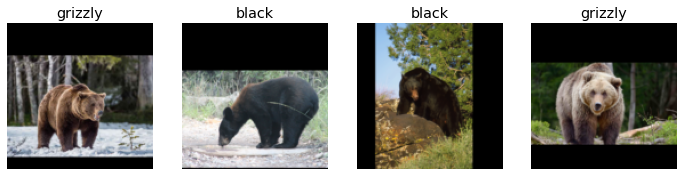

In [13]:
# 이미지를 빈곳 0으로 채우기

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dataloaders 메소드를 호출할 때 비로소 실제 데이터의 경로로 지정
dls = bears.dataloaders(path)
# 데이터 블록  API가 구성한 데이터를 모델에 주입하기 전에 미리 확인
dls.train.show_batch(max_n=4,nrows=1)

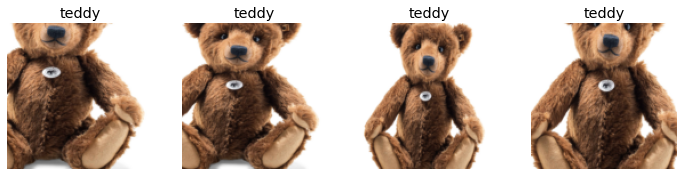

In [14]:
# 실전에서는 특정 부분을 무작위로 선택하여 잘라내는 방식을 보편적으로 사용

bears = bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
# dataloaders 메소드를 호출할 때 비로소 실제 데이터의 경로로 지정
dls = bears.dataloaders(path)
# 데이터 블록  API가 구성한 데이터를 모델에 주입하기 전에 미리 확인
# unique 서로 다른 이미지를 확인
dls.train.show_batch(max_n=4,nrows=1, unique=True)

### 2.3.1 데이터 증강
  - 입력 데이터를 임의로 변형해 새로운 데이터를 생성하는 기법

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


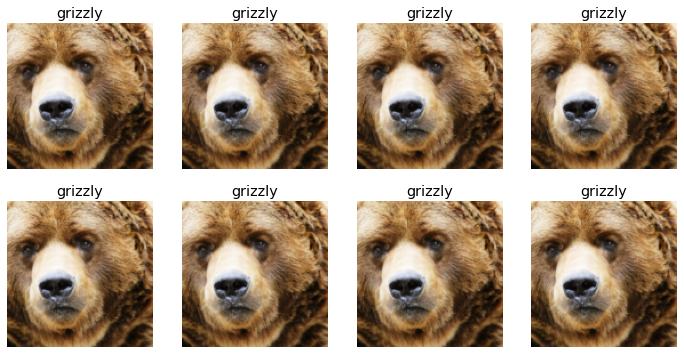

In [15]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dataloaders 메소드를 호출할 때 비로소 실제 데이터의 경로로 지정
dls = bears.dataloaders(path)
# 데이터 블록  API가 구성한 데이터를 모델에 주입하기 전에 미리 확인
# unique 서로 다른 이미지를 확인
dls.valid.show_batch(max_n=8,nrows=2, unique=True)

## 2.4 모델 훈련과 훈련된 모델을 이용한 데이터 정리
  - 곰별로 150장
  - 이미지 크기에 랜덤하게 자르기 : RandomResizedCrop, 224px
  - 이미지 임의로 변형 : aug_transforms


In [16]:
bears = bears.new(item_tfms=RandomResizedCrop(224,min_scale=0.5), batch_tfms=aug_transforms())
# dataloaders 메소드를 호출할 때 비로소 실제 데이터의 경로로 지정
dls = bears.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics =error_rate)
learn.fine_tune(4)



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


  - 모델이 회색곰을 테디베어 또는 흑곰으로 판단했는지 오차행렬(confusion matrix)를 만들어 시각적으로 파악

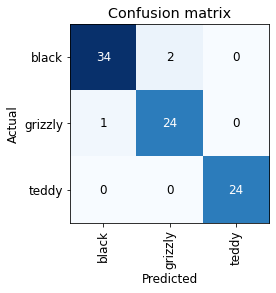

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

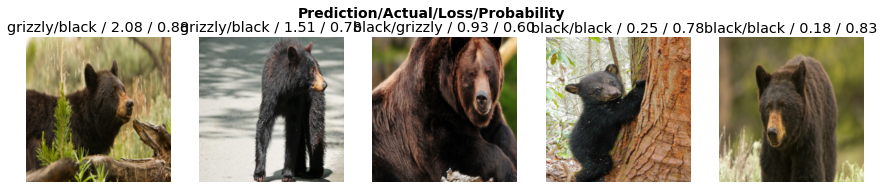

In [18]:
# 손실 : 모델이 올바르지 않거나 올바르지만 결과를 신뢰할 수 없으면 값이 높아집니다.
# 예측된범주, 실제범주(타킷레이블), 손실, 확률정보

interp.plot_top_losses(5,nrows=1)

In [19]:
# GUI로 데이터를 정리
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


## 2.5 모델을 온라인 애플리케이션으로 전환하기
### 2.5.1 추론에 모델 사용하기
  - 모델은 두 부분으로 구성 ( 모델의 구조와 학습된 파라미터)
  - 모델의 export 메소드를 사용
  - export메소드는 DataLoaders 생성 방법의 정의까지 저장
  - 그렇지 않으면 데이터의 변형 방법을 다시 정의해야 하기 대문에
  

In [20]:
learn.export()


In [21]:
# fastai가 파이썬의 표준 클래스 Path에 추가한 ls메소드를 사용하여 확인
path = Path()
path.ls(file_exts='.pkl')
# 이 파일은 애플리케이션이 배포되는 곳에 옮기는 것이 정석

(#1) [Path('export.pkl')]

  - 추론(inference): 모델을 학습 대신 예측에 사용하는 것
  - load_learner함수를 사용하면 파알로 저장된 모델로 추론용 Learner 객체를 생성(주피터 노트북은 이미 Learner객체가 있어 불필요)

In [22]:
# 추론용  Learner가 필요한 딥러닝 프로젝트의 전체적인 흐름을 파악할 목적으로 수행
learn_inf = load_learner(path/'export.pkl')


In [23]:
# 일반적으로 추론 시에는 한번에 한 장의 이미지를 예측
learn_inf.predict('images/grizzly.jpg')
# 결과 해석 : 예측된 범주, 예측된 범주의 색인번호, 범주별 확률

('grizzly', tensor(1), tensor([7.0105e-07, 1.0000e+00, 8.8637e-09]))

In [24]:
# Learner의 dls 속성을 활용해서 실제 DataLoaders에도 접근이 가능
learn_inf.dls.vocab
# 해당 범주 두번째인 grizzly를 예측한다는 것을 알 수 있음.

['black', 'grizzly', 'teddy']

### 2.5.2 모델로 노트북 애플리케이션 만들기
  - 여기서는 주피터노트북으로 웹 애플리케이션을 만드는 방법
  - IPython 위젯(ipywidgets) : 자바스크립트와 파이썬을 함께 묶어 웹 브라우저상에서 파이썬을 사용할 수 있도록 만들어 주는 GUI구성요소 , 사용자가 직접 주피터 노트북을 실행해야하는 단점 
  - Voila : 사용자가 주피터 노트북을 사용하지 않ㄷ더라도 IPython 위젯으로 구성된 애플리케이션에 접근할 수 있도록 만들어 주는 시스템

In [25]:
# 1. 예측할 이미지 파일을 업로드하는 위젯이 필요
btn_upload = widgets.FileUpload()
btn_upload

# 2. 업로드한 이미지를 가져오기
img = PILImage.create(btn_upload.data[-1])

FileUpload(value={}, description='Upload')

In [27]:
# 3. Output 위젯으로 해당 이미지 출력
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


Output()

In [28]:
# 4. predict메소드를 사용하여 예측
pred,pred_idx, probs = learn_inf.predict(img)

In [29]:
# 5. Label 위젯을 사용해서 예측 결과를 화면에 출력
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction : {pred}; Probability:{probs[pred_idx]:.04f}' #소수점 4번째자리까지 출력
lbl_pred

Label(value='Prediction : grizzly; Probability:0.9999')

In [30]:
# 사용자는 내부 코드를 알 필요가 없으므로 버튼 내부에서 앞서 검증된 코드를 심는다.
# Button  위젯으로 이미지 분류를 요청하는 버튼을 만듭니다.
btn_run = widgets.Button(description ='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [33]:
#  버튼을 눌렀을 때 호출되어 일련의 작업을 수행하는 클릭이벤트핸들러가 필요합니다.
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction : {pred}; Probability:{probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)



In [34]:
# VBox(vertical box)에 지금까지 만든 위젯을 나열하여 완성
VBox([widgets.Label('Select your bear'), btn_upload, btn_run, out_pl, lbl_pred])

### 2.5.3 노트북을 실제 애플리케이션으로 바꾸기
  - Voila 설치
  - Volia를 주피터 노트북에 확장프로그램으로 등록

In [ ]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix